# The art of making data sets

Often a data scientist is in need to think through a problem that a dataset might raise. Thinking data in abstract terms is not easy. But, Data Scientists are lucky because they know Python and can use the programming language to create data themselves. Creating data can help explore how the data might change or vary under different scenarios or hypothesis.

For example, imagine having a complex and in important dataset in front of you, a very difficult problem, too much data and very noisy data. After plotting and describing the datasetand as we have done in Tutorials 7 and 8, the Data Scientist formulates an hypothesis about the dataset. Now the dataset is so big and noisy that working directly with the dataset is slow and tedious and access to better computing facility is not possible. So the Data Scientist thinks: "Maybe I can generate a smaller dataset with the properties of the big dataset, just to thing through things and look at whether the pattern that the simulated dataset shows is similar to the big dataset i was given to study." Generating a dataset that is small and easy to work with and look at would really fcilitate the work of the Data Scientst. This process is called data simulation and we will explore more of this later in the course. For now let's think a specific example.

### An Alien Data Scientist (ADAS)
Imagine an Alien Data Scientist from [Proxima d](https://www.scientificamerican.com/article/possible-third-planet-spotted-around-proxima-centauri-our-suns-nearest-neighbor-star/) wanting to understand a weird activity pattern they have notice from some measurements they have on Earth. 

ADAS detected a large increase in heat and pollution on Earth by using a **Heat Sensitive Proxiscope (HeatSPro)**. The HeatSPro pattern follows the sun-light cycle, yet, the measurements show higher heat on earth than predicted by sunlight alone. The increase in heat goes just a little bit beyond what is predicted by the increase in heat due to the sunlight, and given how difficult it is to measure from hearth the measurements fade in. ADAS thinks this might be due to the activity of living organisms on earth that might be moving around and perhaps even burning elements on earth. ADAS hypothesizes that the discrepancy between the heat pattern predicted by the Sun cycle and the measurement could a first demonstration of life on earth. ADAS understands that each organism can only burn little and contribute very little to the HeatSPro measurements.  But ADAS thinks that if enough organisms exist on earth perhaps enough heat might be generated so that the pattern of heat measured by the HeatSPro might be explained by life on earth. 

ADAS decides to make a rough simulation of the situation. Not really following any physics law or real measurement but just to give him an idea of how the data would look like.

### Simulating ADAS' hypothesis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster') # picking our preferred plotting style

#### Simulating the Sun Cycle

Text(0, 0.5, 'Mean Earth Temperature')

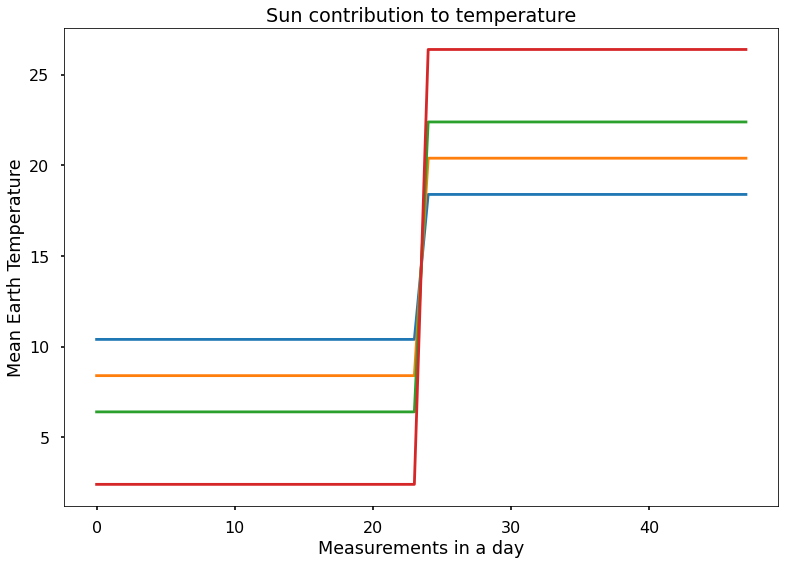

In [2]:
sun_cycle = 24 # duration of the sun cycle (in hours)
num_days = 4 # For how many days did HeatSPro measure?
measurement_rate = 2 # how many measurements per hour HeatSPro returns?
                    # --it measures every 30 mins.
temp_change_each_day = [4, 6, 8, 12];
# total number of measurements
num_measurements = sun_cycle * measurement_rate 
mean_earth_temp = 14.4 # in °C

# Make a super-simplue simulation of the measurements 
# across all days at the rate per day given by HeatSPro

# First we make a vector of mean earth temperature
t = mean_earth_temp+np.zeros((num_measurements,num_days))

# Now let's decrease the temperature during the night
# and increase it during the day (we assume the night 
# to be at the beginnig of the measurements)
night_temp = np.zeros( (num_days,1) )
day_temp = np.zeros( (num_days,1) )

night_temp[0] = mean_earth_temp-temp_change_each_day[0] 
day_temp[0] = mean_earth_temp+temp_change_each_day[0] 

night_temp[1] = mean_earth_temp-temp_change_each_day[1] 
day_temp[1] = mean_earth_temp+temp_change_each_day[1] 

night_temp[2] = mean_earth_temp-temp_change_each_day[2] 
day_temp[2] = mean_earth_temp+temp_change_each_day[2] 

night_temp[3] = mean_earth_temp-temp_change_each_day[3] 
day_temp[3] = mean_earth_temp+temp_change_each_day[3] 

t[0:24,:1] = night_temp[0]*np.ones((24, 1))
t[24:48,:1] = day_temp[0]*np.ones((24, 1))

t[0:24,1:2] = night_temp[1]*np.ones((24, 1))
t[24:48,1:2] = day_temp[1]*np.ones((24, 1))

t[0:24,2:3] = night_temp[2]*np.ones((24, 1))
t[24:48,2:3] = day_temp[2]*np.ones((24, 1))

t[0:24,3:4] = night_temp[3]*np.ones((24, 1))
t[24:48,3:4] = day_temp[3]*np.ones((24, 1))

# Let's plot what we just simulated
# This is an extremely simple model.
# Only two temperatures, night and day, 
# no transitions in temperature,
plt.plot(t)
plt.title('Sun contribution to temperature')
plt.xlabel('Measurements in a day')
plt.ylabel('Mean Earth Temperature')

#### The HeatSPro measurements

Text(0, 0.5, 'Measurement noise')

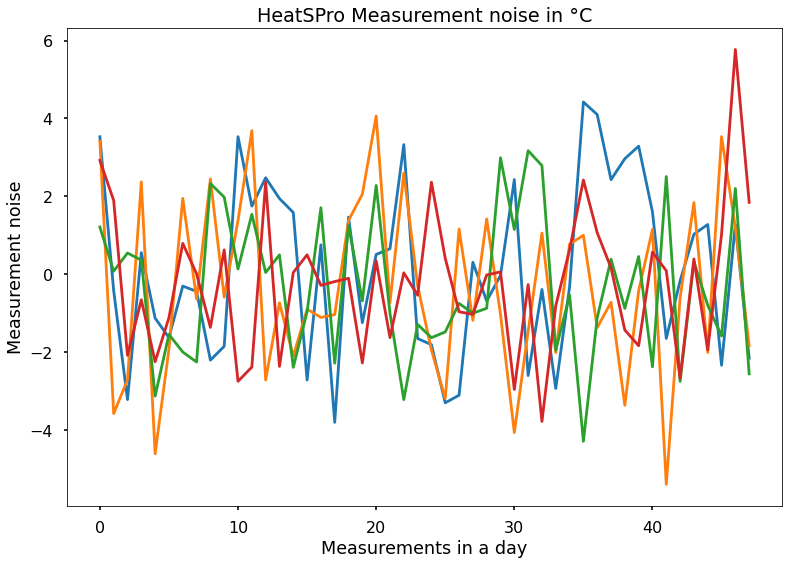

In [3]:
# After simulating the temperature of the earth over 4 days
# we will want to simulate the noisy measurements that HeatSPro 
# was able to capture. To do that we will simply add noise.
# We will assume that the noise in the measurements on HeatSPro
# is independent at every measurement
noise_amplitude = 2 # how much the noise disrupts the measurements in °C
measurement_noise = noise_amplitude * np.random.randn(*t.shape) # Note the `*` is used here for compatibility

plt.plot(measurement_noise)
plt.title('HeatSPro Measurement noise in °C')
plt.xlabel('Measurements in a day')
plt.ylabel('Measurement noise')

#### Simulating the HeatSPro measurements of the Sun Cycle

Text(0, 0.5, 'Temperature in °C')

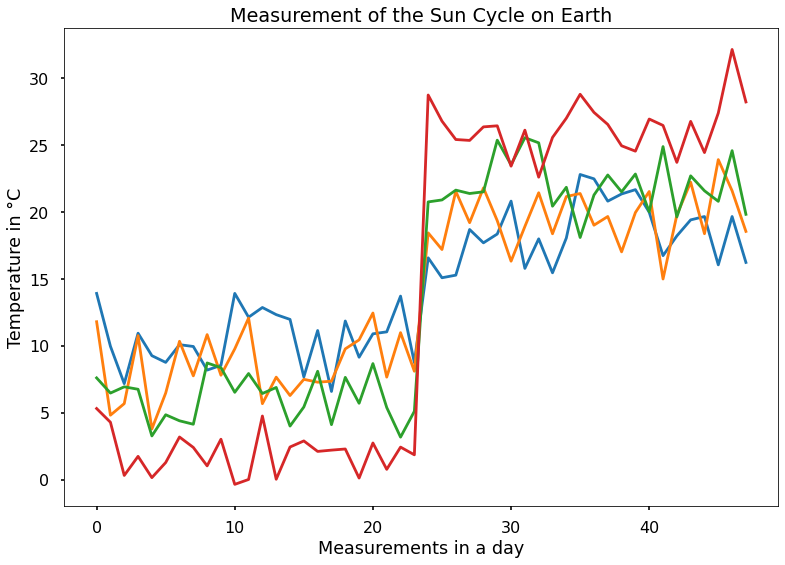

In [4]:
# After simulating the temperature of the earth and the measurement noise
# We can put the two together to make a simulated measurement of the earth 
# temperature over 4 days as seen by HeatSPro and ADAS`

# To do so, we will add the noise to the signal
measurements = measurement_noise + t 

plt.plot(measurements)
plt.title('Measurement of the Sun Cycle on Earth')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')

### The average measurement from HeatSPro

Text(0, 0.5, 'Temperature in °C')

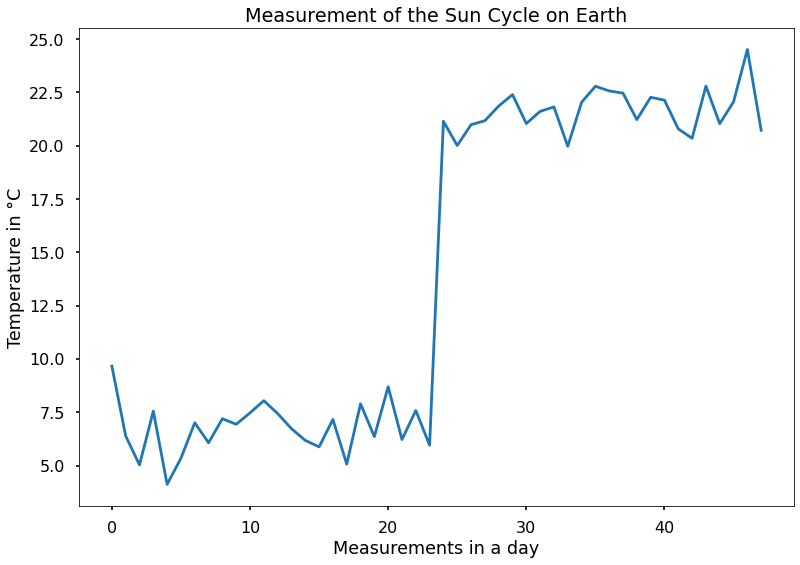

In [5]:
# In the cells above we went a long way to simulate one experiment of our distant friend 
# the alien ADAS. Using their powerful proxiscope HeatSPRo they measured the earth temperature
# over 4 consecutive days and received 48 x 4 measurements.

# ADAS knows the noise is additive and independent in the measurements. So, to reduce 
# the influence of noise ADAS decides to average across the 4 days.
average_meas = np.mean(measurements, axis=1) # here we use Numpy's mean function on the second dimension axis=1

plt.plot(average_meas)
plt.title('Measurement of the Sun Cycle on Earth')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')

In [ ]:
# Note on reshaping average mean
#
# np.mean() will return a tuple with the dimension we used to average over **eliminated**. 
# In our case above, we averaged over the second dimension, so that dimension is technically empty 
# i.e., average_meas has shape (48,), let's check it out

average_meas.shape

In [ ]:
# OK so, that is a problem, if the second dimension of the tuple is empty. We are not going to be able to add
# average_meas with other numpy arrays of shape (48,1), which is the shape we are working on in this tutorial
# 
# It is often convenient to fix this issue so that the array is compatible with the rest of the arrays we have been
# using. To fix this issue we can use the numpy method "newaxis" to add a new dimension (axis) to our tupple to make
# it a proper array. 

average_meas = average_meas[:,np.newaxis]
average_meas.shape

# Another way to do this is with the numpy array method "reshape"
# average_meas = average_meas.reshape(-1,1)

# We passed -1 to the first dimension, and a 1 to the the second dimension — the columns — 
# because that was the dimension we wanted to reshape. 
# The first dimension instead we wanted to keep as passed. Think of -1 as 'leave as is if possible' 

OK that helped with two type of noise actually:

-- The variation in temperature across 4 consectuve days

-- measureemnt noise

So, although we lost the information about temperatures in individual days, we did overall
reduce the noise estimates.

Note everything we did above (or almost everything) was something we had already seen in the previous tutorials. Yet, we are now simulating a process.

### Simulating the contribution of humans
ADAS think the earth's organisms are adding a little bit of heat only during the day 
by perhaps burning things around to fuel their activities. So to simulte something like that ADAS can take the mean measurement from HeatSPro and add to it a little bit of signal (heat) and a little bit of noise both contributed by one organism. Yet, because ADAS thinks the organisms must be increasing the earth's temperature only during the day, it can add the temperatures only during the day (remember no activity during the night).

Text(0, 0.5, 'Temperature in °C')

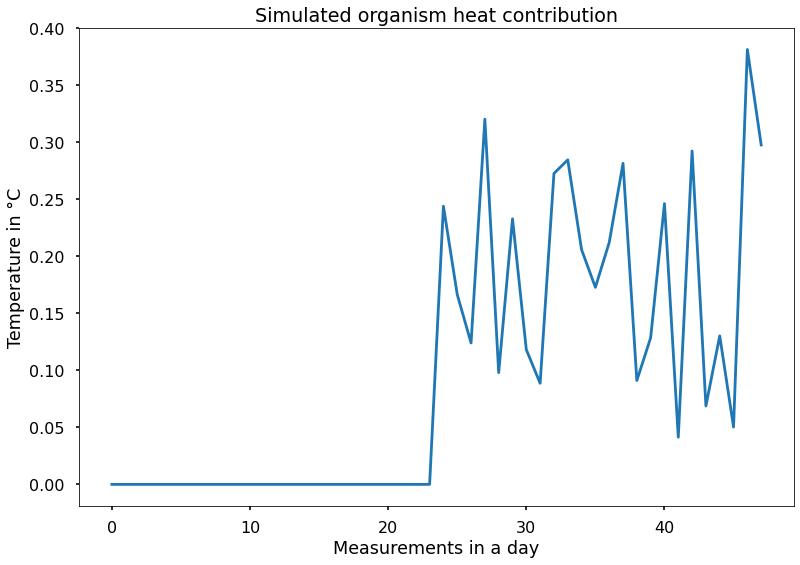

In [6]:
# Next ADAS must make an assumption about
# A) how much heat each organism might add, ADAS assumes (as a start) 0.2 Degrees Celsius
# B) some variations across measurements that each organism adds, 
#    ADAS will assume 50% of the 0.2 variation (i.e., 0.1)
organism_mean_heat = 0.2
organism_std_heat  = 0.1

organism_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)

# Finally we build a vector of the heat contributed by this organism to the whole day of measurements
# The heat is added only during the day, not the night, so it is added below only to the second part
# of the measurements (the last 24 measurements), the first measurements (0:23) are filled with Zeros 
organism_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism_activity_heat) )

plt.plot(organism_daily_heat)
plt.title('Simulated organism heat contribution')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')

### Let's add this single organism heat to the earth heat
Next, ADAS will sum the average heat from the sun to the contribution from a single organism. This is a sum of two arrays of shape (48,1). ADAS will then want to **see** the second array plot (in blue below). If we do not get to see it, it means that the contribution of one organism is not sufficient to increase the earth's daily heat measurements beyond what the sun does to the earth. let's take a look.


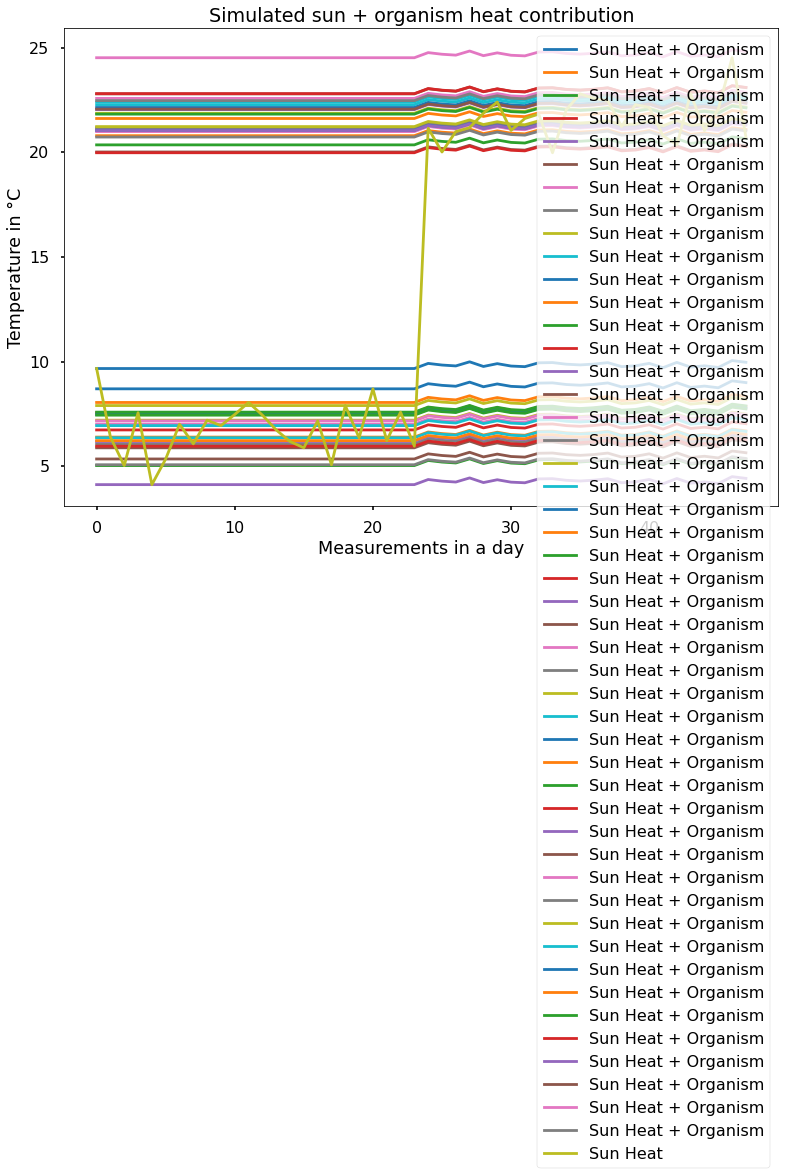

In [7]:
# Here ADAS sums the two arrays
sun_plus_organisms = average_meas + organism_daily_heat

plt.plot(sun_plus_organisms, label = "Sun Heat + Organism")
plt.plot(average_meas, label = "Sun Heat")
plt.title('Simulated sun + organism heat contribution')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')
plt.legend()

OK, that did not seem to make a difference. We cannot really see the blue line. So, ADAS thinks "Oh, well it is highly unlikely that a single organism lives on earth. What if many more similar organisms lived the planet? Say 2?"

So, he repeats the opertions above but simulates two organisms.

Text(0, 0.5, 'Temperature in °C')

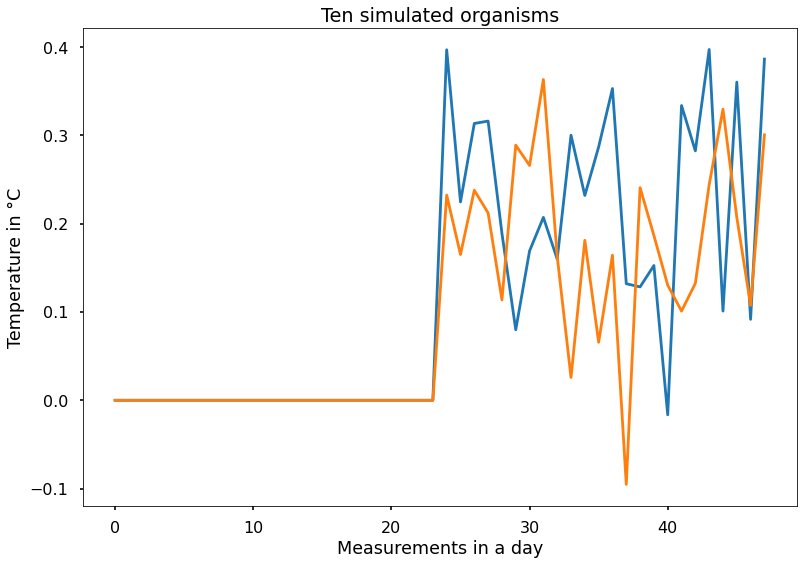

In [8]:
# The assumptions for the each organism will not change
# organism_mean_heat = 0.2
# organism_std_heat  = 0.1

# But now, ADAS needs to build 2 simulated organisms, each organisms will have the same mean 
# heat contribution but a tiny variation on top of it due to 'organism_std_heat' and the 
# fact that we are adding noise:
organism1_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism2_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)

# Finally ADAS builds a vector of the heat contributed by each organism to the whole day of measurements,
# one organisms at the time. So, ADAS gets ten different lines now.
#
# ADAS added only during the day, not the night, so the contributions must be added below only to the second part
# of the measurements (the last 24 measurements), the first measurements (0:23) are filled with Zeros 
organism1_daily_heat = np.vstack(( np.zeros(organism1_activity_heat.shape),  organism1_activity_heat) )
organism2_daily_heat = np.vstack(( np.zeros(organism2_activity_heat.shape),  organism2_activity_heat) )

# ADAS plots the data, one organism at the time, using different colors.
plt.plot(organism1_daily_heat)
plt.plot(organism2_daily_heat)
plt.title('Ten simulated organisms')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')

After creating 10 organisms, ADAS will need to make an assumption about how they contribute to heating the earth. ADAS decides to assume that each organisms contribute independently. If the contribute independently the heat contribution of each organism will sum. After assuming independence, ADAS can make the operation and **sum** the contributions of individual organisms.

In [9]:
# numpy hstack to group all the organisms in a (48, 10) array and then compute the sum across the second dimension 
organisms_group = np.hstack( (organism1_daily_heat, organism2_daily_heat) )

In [10]:
organisms_group.shape

(48, 2)

In [11]:
# numpy sum can be used over the second dimension (axis=1) to sum across the two organisms
organisms_sum = np.sum(organisms_group, axis=1)

# as it happened before the output will be a (48,) tuple. This is incompatible with the other 
# vectors (i.e., `average_meas`), so reshape can be to fix the shape
organisms_sum = organisms_sum.reshape(-1,1)

Now ADAS is in a position to compare the cumulative effect of 10 organisms on the Earth's temperature measured.

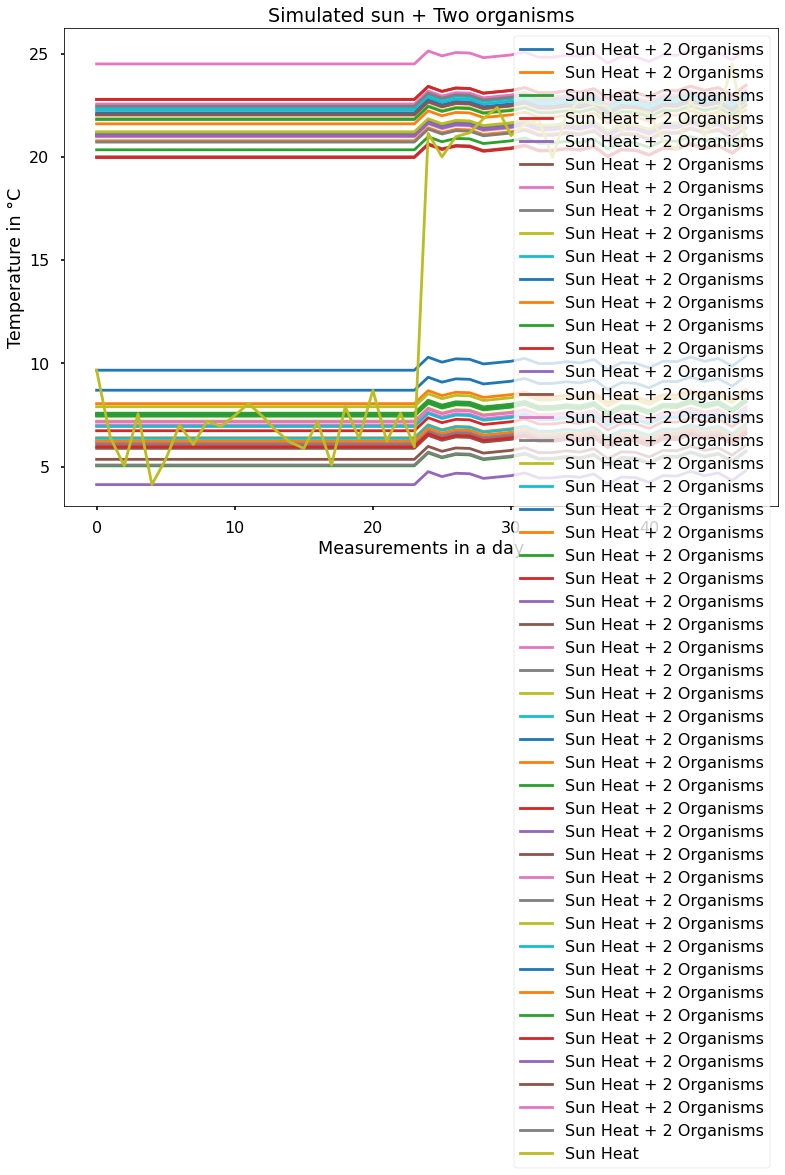

In [12]:
sun_plus_organisms = average_meas + organisms_sum

plt.plot(sun_plus_organisms, label = "Sun Heat + 2 Organisms")
plt.plot(average_meas, label = "Sun Heat")
plt.title('Simulated sun + Two organisms')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')
plt.legend()

OK. It looks like with ten organisms the contribution is substantial. ADAS might be thinking "This is going somewhere." Yet, for ADAS to trust hypothesis, it is necessary for the noise of the two signals (blue and orange lines) to not overlap. Many operations can affect that noise (for example? Which variables above affect the noise in the plot?). 

Yet, ADAS trusts his assumptions on noise and the individual organisms' contributions. ADAS decides to focus only on the number of organisms, not any of the other variables. "It must be the case that more than 10 organisms live on Earth," ADAS thinks.

So ADAS repeats the experiment and adds 10 new organisms.

Text(0, 0.5, 'Temperature in °C')

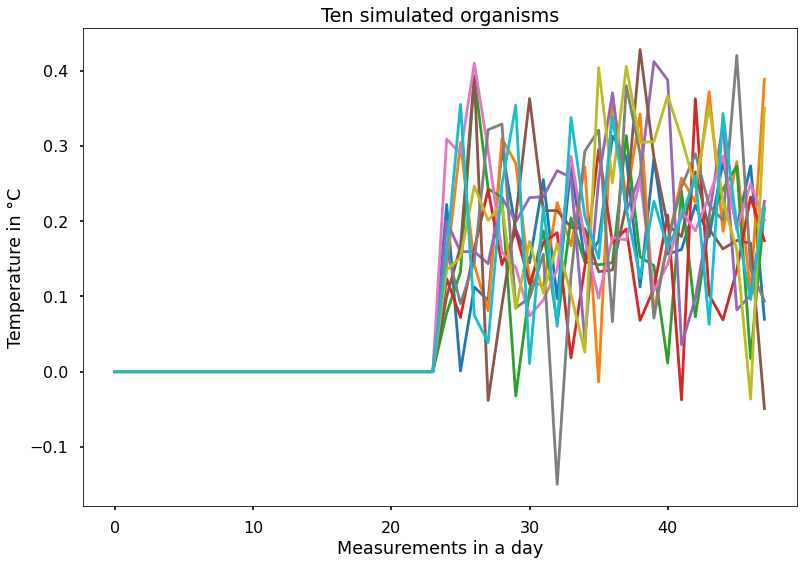

In [13]:
# Again, the assumptions for the each organism will not change
# organism_mean_heat = 0.2
# organism_std_heat  = 0.1

organism1_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism2_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism3_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism4_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism5_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism6_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism7_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism8_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism9_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism10_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)

# Finally we build a vector of the heat contributed by this organism to the whole day of measurements
# The heat is added only during the day, not the night, so it is added below only to the second part
# of the measurements (the last 24 measurements), the first measurements (0:23) are filled with Zeros 
organism1_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism1_activity_heat) )
organism2_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism2_activity_heat) )
organism3_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism3_activity_heat) )
organism4_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism4_activity_heat) )
organism5_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism5_activity_heat) )
organism6_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism6_activity_heat) )
organism7_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism7_activity_heat) )
organism8_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism8_activity_heat) )
organism9_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism9_activity_heat) )
organism10_daily_heat = np.vstack(( np.zeros(organism_activity_heat.shape),  organism10_activity_heat) )

plt.plot(organism1_daily_heat)
plt.plot(organism2_daily_heat)
plt.plot(organism3_daily_heat)
plt.plot(organism4_daily_heat)
plt.plot(organism5_daily_heat)
plt.plot(organism6_daily_heat)
plt.plot(organism7_daily_heat)
plt.plot(organism8_daily_heat)
plt.plot(organism9_daily_heat)
plt.plot(organism10_daily_heat)
plt.title('Ten simulated organisms')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')

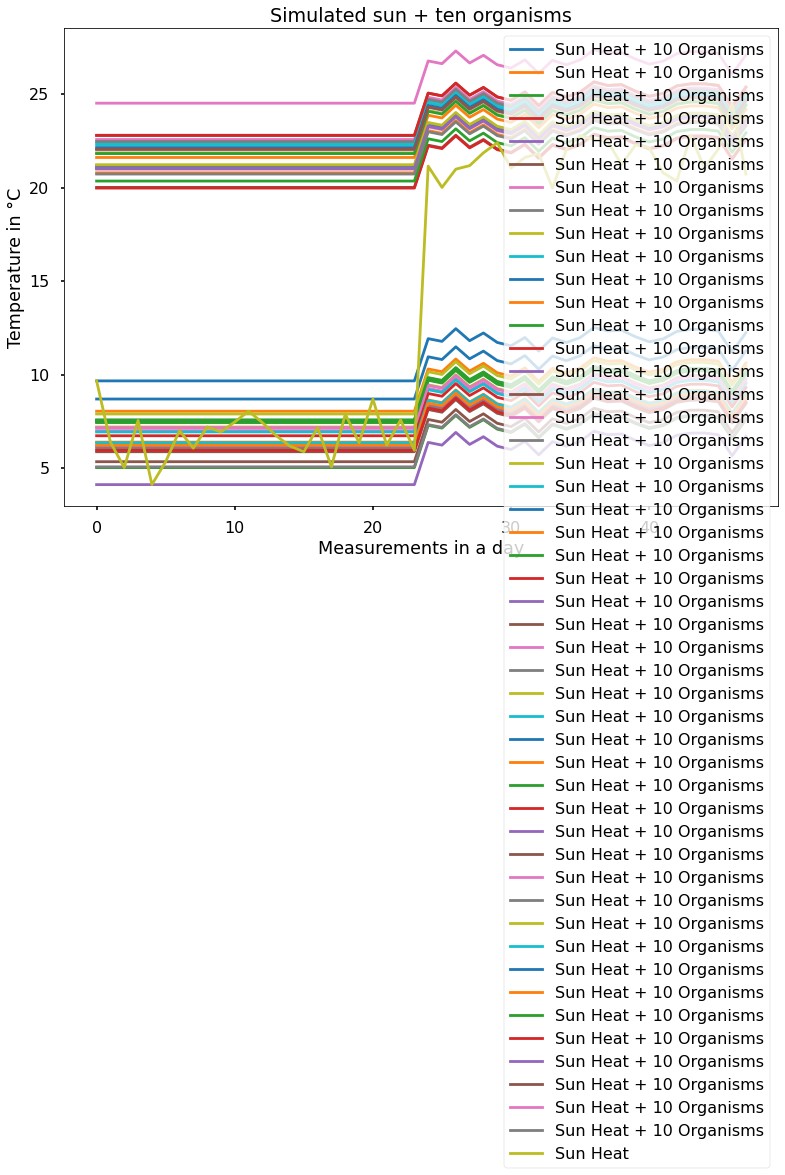

In [14]:
# Finally, we can add the individual contributions from each organism to the simulated earth's temperature

# We can use numpy hstack to group all the organisms in a (48, 10) array and then comput the sum across the second dimension 
organisms_group = np.hstack( (organism1_daily_heat, 
                              organism2_daily_heat, 
                              organism3_daily_heat, 
                              organism4_daily_heat, 
                              organism5_daily_heat, 
                              organism6_daily_heat, 
                              organism7_daily_heat, 
                              organism8_daily_heat, 
                              organism9_daily_heat, 
                              organism10_daily_heat) )

# We can use numpy sum over the second dimension and sum across all organisms
organisms_sum2 = np.sum(organisms_group, axis=1)

# as it happened before the output will be a (48,) tuple. 
# This is incompatible with our other vector `average_meas`
# This time, let's try using reshape to fix this
organisms_sum2 = organisms_sum2.reshape(-1,1)

# Finally we can sume all contributions to heating
sun_plus_organisms = average_meas + organisms_sum + organisms_sum2

plt.figure().clear
plt.plot(sun_plus_organisms, label = "Sun Heat + 10 Organisms")
plt.plot(average_meas, label = "Sun Heat")
plt.title('Simulated sun + ten organisms')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')
plt.legend()

After looking at the plot above ADAS thinks: "OK that is it. I am correct. I am not going to do anything else. I think there is most likely life on earth. I am sure there are more than 10 organisms on earth, that sounds pretty reasonable. My calculations might be slight overestimates (especially regarding how much each indviidual contributes to heating the earth) but given how parsimonious I was with the other numbers (10 organisms only on a planet as big as the earth is? It must be more). So I belive this my hypothesis is confirmed!" 

"Importantly," ADAS adds, "by doing this simulation, I learned that the only way individual organisms can contribute to the earth temperature is by adding heat but some sort of buring activity. So, that said, I am now happy with my simulations and I am going to go back to work on HeatSPro. I need more samples of data to make sure the pattern I can simulate actually exists in the data!" "There is life on earth!!" ADAS concludes.